# OCR on pdf files

In this notebook, we will look how we can do ocr in pdf files

In [6]:
from pdf2image import convert_from_path
import easyocr
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image
from pylab import rcParams
from PIL import Image as img
import numpy as np
import pandas as pd
rcParams['figure.figsize'] = 8, 16

In [10]:
class ocr():
    def __init__(self, filename):
        self.reader = easyocr.Reader(['en'], gpu=False)
        self.filname = filename
        self.images = convert_from_path(filename, poppler_path="./poppler/Library/bin/")
        self.text = []
        self.outputs = [self.reader.readtext(np.asarray(image)) for image in self.images]
        
    def show_plot(self):
        
        for i in range(len(self.outputs)):
            output = self.outputs[i]
            image = self.images[i]
            
            total_word = len(output)
            image = np.asarray(image)
            for i in range(total_word):
                cord = output[i][0]
                x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
                x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
                cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
                plt.imshow(image)
            plt.show()
            
    def get_text(self):
        all_words = []
        for output in self.outputs:
            words = []
            for word in output:
                words.append(word[-2])
            all_words.append(words)
        print(all_words)

# OCR

In [11]:
# path to the file, on which we need to do OCR
file_path = "./Deepak.pdf"

In [12]:
# creating instance of the object
resume = ocr(file_path)

Using CPU. Note: This module is much faster with a GPU.


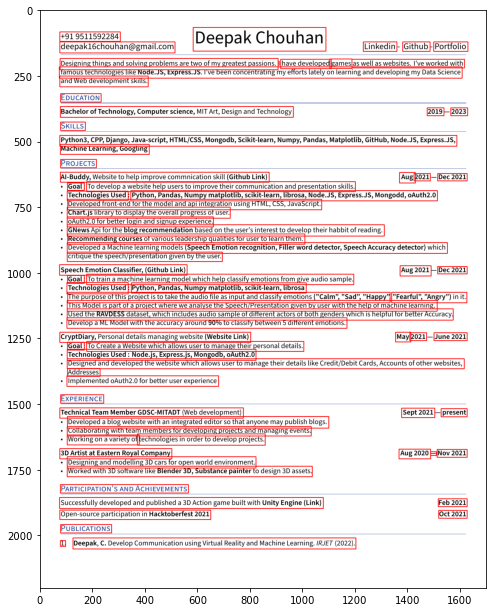

In [13]:
# shows the bounding box on pdf
resume.show_plot()

In [14]:
# extracted text
resume.get_text()

[['+91 9511592284', 'Deepak Chouhan', 'deepakl6chouhan@gmailcom', 'Linkedin', 'Github', 'Portfolio', 'Designing things and solving problems are two of my greatest passions', 'have developed', "as wellas websites. |'ve worked with", "famous technologies like Node.JS, Express.JS. I've been concentrating my efforts lately on learning and developing my Data Science", 'and Web development skills.', 'EDUCATION', 'Bachelor of Technology, Computer science, MIT Art; Design and Technology', '2019', '2023', 'SKILLS', 'Python3, CPP; Django, Java-script, HTML/CSS, Mongodb, Scikit-learn, Numpy, Pandas, Matplotlib, GitHub, Node-JS, Express JS,', 'Machine Learning; Googling', 'PROJECTS', 'Al-Buddy, Website to help improve commnication skill (Github Link)', '2021', 'Dec 2021', 'Goal', 'To develop a website help users to improve their communication and presentation skills', 'Technologies Used', 'Python, Pandas, Numpy matplotlib, scikit-learn, librosa, Node-JS, Express JS, Mongodd, oAuth2.0', 'Developed 